In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def calculate_burn_rate(chamber_pressure, propellant_properties):
  
  burn_rate_coefficient = propellant_properties["burn_rate_coefficient"]
  pressure_exponent = propellant_properties["pressure_exponent"]

  burn_rate = burn_rate_coefficient * chamber_pressure**pressure_exponent

  return burn_rate


In [10]:
propellant_properties = {
    "burn_rate_coefficient": 0.0000283,
    "pressure_exponent": 0.437
}

chamber_pressures = np.linspace(1e6, 10e6, 100) # Pa
burn_rates = []

for chamber_pressure in chamber_pressures:
  burn_rate = calculate_burn_rate(chamber_pressure,  propellant_properties)
  burn_rates.append(burn_rate)

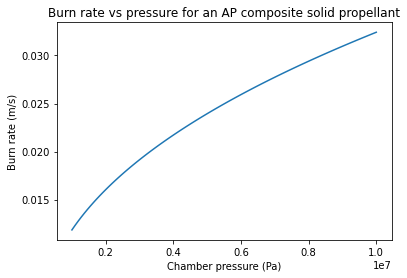

In [12]:
plt.plot(chamber_pressures, burn_rates)
plt.xlabel("Chamber pressure (Pa)")
plt.ylabel("Burn rate (m/s)")
plt.title("Burn rate vs pressure for an AP composite solid propellant")
plt.show()